# Crime_Project
* Observations and Trends at State Level
* Observations and Trends at Chicago

### Dependencies and Setup

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()

pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = '{:,.2f}'.format

from my_func import DataAnalysis
# Object Methods:
    # def __init__(self, x, y)
    # def lin_regr(self)
    # def scat_plot(self)

### Import DataSets for Analysis
* states_total.csv (generated by api request: census_states.ipynb, source of data: census.org)

In [2]:
filter_columns = ['State_Name', 'Year', 'Population', 'House_Income', 'Per_Cap_Income', 'Pov_Rate','Unemp_Rate','Geo','Lat','Lng']
states_econ = pd.read_csv('resources/states_total.csv').filter(filter_columns)
#states_econ = states_econ.rename(columns={'State_Name':'State'})
states_econ = states_econ[(states_econ['Year'] == 2011)].filter(filter_columns)
year_econ = states_econ.groupby('Year').sum()
states_econ = states_econ.rename(columns={'State_Name':'State'})
states_econ.head()

,State,Year,Population,House_Income,Per_Cap_Income,Pov_Rate,Unemp_Rate,Geo,Lat,Lng
0,Alabama,2011,"4,747,424.00","42,934.00","23,483.00",17.13,4.54,South,32.78,-86.83
1,Alaska,2011,"700,703.00","69,014.00","31,944.00",9.29,4.41,North,64.07,-152.28
2,Arizona,2011,"6,337,373.00","50,752.00","25,784.00",15.84,4.23,South,34.27,-111.66
3,Arkansas,2011,"2,895,928.00","40,149.00","21,833.00",17.85,3.94,South,34.89,-92.44
4,California,2011,"36,969,200.00","61,632.00","29,634.00",14.10,5.06,South,37.18,-119.47


* state_crime.csv 

In [3]:
filter_columns = ['State', 'Year', 'Data.Totals.Property.All', 'Data.Totals.Violent.All', 'Data.Totals.Property.Burglary',
                 'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor', 'Data.Totals.Violent.Assault',
                 'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape', 'Data.Totals.Violent.Robbery']
states_crime = pd.read_csv('resources/state_crime.csv').filter(filter_columns)
states_crime = states_crime.rename(columns={
                    'Data.Totals.Property.All': 'Crime_Prop',
                    'Data.Totals.Property.Burglary': 'Burglary',
                    'Data.Totals.Property.Larceny': 'Larceny',
                    'Data.Totals.Property.Motor': 'Motor',
                    'Data.Totals.Violent.Assault': 'Assault',
                    'Data.Totals.Violent.Murder': 'Murder',
                    'Data.Totals.Violent.Rape': 'Rape',
                    'Data.Totals.Violent.Robbery': 'Robbery',
                    'Data.Totals.Violent.All':'Crime_Viol'})
states_crime[['Crime_Prop', 'Crime_Viol']] = states_crime[['Crime_Prop', 'Crime_Viol']].astype(float)
states_crime['Crime_Tot'] = states_crime['Crime_Prop'] + states_crime['Crime_Viol']
states_crime.drop(states_crime[states_crime['State']=='United States'].index, inplace=True)
states_crime[states_crime['Year']==2011].head()

,State,Year,Crime_Prop,Crime_Viol,Burglary,Larceny,Motor,Assault,Murder,Rape,Robbery,Crime_Tot
51,Alabama,2011,"173,192.00","20,166.00",51119,111411,10662,13591,299,1370,4906,"193,358.00"
104,Alaska,2011,"19,094.00","4,416.00",2852,14854,1388,3374,30,436,576,"23,510.00"
157,Arizona,2011,"229,896.00","26,789.00",54695,155400,19801,16748,397,2499,7145,"256,685.00"
210,Arkansas,2011,"110,430.00","14,173.00",34016,70645,5769,10426,160,1230,2357,"124,603.00"
263,California,2011,"973,822.00","154,943.00",230075,596905,146842,91195,1792,7665,54291,"1,128,765.00"


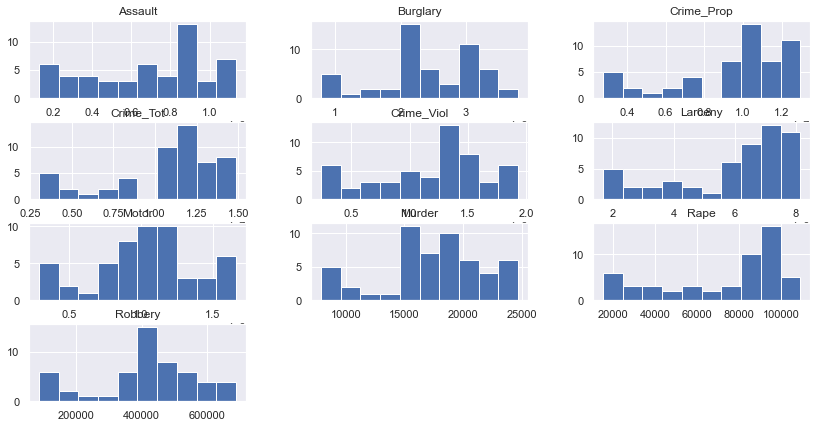

In [4]:
years_crime = states_crime.groupby('Year').sum()
crime_2011 = years_crime[years_crime.index == 2011]
_=years_crime.hist(figsize=(14, 7))

In [5]:
crime_2011

,Crime_Prop,Crime_Viol,Burglary,Larceny,Motor,Assault,Murder,Rape,Robbery,Crime_Tot
Year,,,,,,,,,,
2011,"9,052,743.00","1,206,031.00",2185140,6151095,716508,752423,14661,84175,354772,"10,258,774.00"


In [6]:
crime_2011_adj =crime_2011/year_econ['Population'].values[0]*100000
crime_2011_adj

,Crime_Prop,Crime_Viol,Burglary,Larceny,Motor,Assault,Murder,Rape,Robbery,Crime_Tot
Year,,,,,,,,,,
2011,"2,952.59",393.35,712.69,"2,006.20",233.69,245.41,4.78,27.45,115.71,"3,345.94"


In [7]:
states_crime = states_crime[(states_crime['Year'] == 2011)]
states_crime.set_index(['Year','State'], inplace=True)
states_crime.sum()

Crime_Prop    9,052,743.00
Crime_Viol    1,206,031.00
Burglary      2,185,140.00
Larceny       6,151,095.00
Motor           716,508.00
Assault         752,423.00
Murder           14,661.00
Rape             84,175.00
Robbery         354,772.00
Crime_Tot    10,258,774.00
dtype: float64

In [8]:
states_crime.columns

Index(['Crime_Prop', 'Crime_Viol', 'Burglary', 'Larceny', 'Motor', 'Assault',
       'Murder', 'Rape', 'Robbery', 'Crime_Tot'],
      dtype='object')

In [9]:
for column in states_crime.columns:
    states_crime[column] = states_crime[column]/(states_econ['Population'].values)*100000
states_crime.head()

Crime_Prop  Crime_Viol  Burglary  Larceny  Motor  Assault  \
Year State                                                                   
2011 Alabama       3,648.13      424.78  1,076.77 2,346.77 224.58   286.28   
     Alaska        2,724.98      630.22    407.02 2,119.87 198.09   481.52   
     Arizona       3,627.62      422.71    863.05 2,452.12 312.45   264.27   
     Arkansas      3,813.29      489.41  1,174.61 2,439.46 199.21   360.02   
     California    2,634.14      419.11    622.34 1,614.60 397.20   246.68   

                 Murder  Rape  Robbery  Crime_Tot  
Year State                                         
2011 Alabama       6.30 28.86   103.34   4,072.90  
     Alaska        4.28 62.22    82.20   3,355.20  
     Arizona       6.26 39.43   112.74   4,050.34  
     Arkansas      5.52 42.47    81.39   4,302.70  
     California    4.85 20.73   146.85   3,053.26

In [10]:
states_crime.reset_index(inplace=True)
states_crime.to_csv("resources/crime_analysis.csv", encoding="utf-8", index=False)

* cdc_analysis.csv (Leading causes of Death) 

In [11]:
# Import data
states_deaths = pd.read_csv('resources/cdc_analysis.csv')
states_deaths.head()

,All causes,Alzheimer,CLRD,Cancer,Diabetes,Heart,Pneumonia,Kidney,Stroke,Suicide,Injuries,State,Geo
0,"1,025.42",31.30,61.34,215.55,26.92,251.55,20.03,22.05,54.09,13.78,56.07,Alabama,South
1,549.31,10.28,27.69,133.44,15.27,105.47,8.28,7.56,23.98,20.41,54.94,Alaska,North
2,763.42,37.05,49.96,168.68,27.46,168.24,10.89,6.23,33.89,18.30,48.85,Arizona,South
3,"1,023.96",34.60,68.54,224.35,31.35,247.52,25.10,27.18,58.43,15.95,52.14,Arkansas,South
4,649.03,31.26,36.13,152.69,20.81,161.68,16.77,7.03,36.52,10.81,29.28,California,South


In [12]:
states_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        51 non-null     int64  
 1   State       51 non-null     object 
 2   Crime_Prop  51 non-null     float64
 3   Crime_Viol  51 non-null     float64
 4   Burglary    51 non-null     float64
 5   Larceny     51 non-null     float64
 6   Motor       51 non-null     float64
 7   Assault     51 non-null     float64
 8   Murder      51 non-null     float64
 9   Rape        51 non-null     float64
 10  Robbery     51 non-null     float64
 11  Crime_Tot   51 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 4.9+ KB


* creating common dataset for exploration

In [13]:
states_data = pd.merge(states_econ, states_crime, how='inner')
states_data_2011 = pd.merge(states_data, states_deaths, how='inner')
states_data_2011.to_csv("resources/states_2011.csv", encoding="utf-8", index=False)
states_data_2011.head()

,State,Year,Population,House_Income,Per_Cap_Income,Pov_Rate,Unemp_Rate,Geo,Lat,Lng,...,Alzheimer,CLRD,Cancer,Diabetes,Heart,Pneumonia,Kidney,Stroke,Suicide,Injuries
0,Alabama,2011,"4,747,424.00","42,934.00","23,483.00",17.13,4.54,South,32.78,-86.83,...,31.30,61.34,215.55,26.92,251.55,20.03,22.05,54.09,13.78,56.07
1,Alaska,2011,"700,703.00","69,014.00","31,944.00",9.29,4.41,North,64.07,-152.28,...,10.28,27.69,133.44,15.27,105.47,8.28,7.56,23.98,20.41,54.94
2,Arizona,2011,"6,337,373.00","50,752.00","25,784.00",15.84,4.23,South,34.27,-111.66,...,37.05,49.96,168.68,27.46,168.24,10.89,6.23,33.89,18.30,48.85
3,Arkansas,2011,"2,895,928.00","40,149.00","21,833.00",17.85,3.94,South,34.89,-92.44,...,34.60,68.54,224.35,31.35,247.52,25.10,27.18,58.43,15.95,52.14
4,California,2011,"36,969,200.00","61,632.00","29,634.00",14.10,5.06,South,37.18,-119.47,...,31.26,36.13,152.69,20.81,161.68,16.77,7.03,36.52,10.81,29.28


## Data Exploration
* 2011

In [14]:
# Extracting Data for 2011
expl_col = ['State', 'Year', 'Geo', 'Crime_Tot', 'Pov_Rate', 'Unemp_Rate', 'Lat', 'Crime_Prop', 'Crime_Viol',
            'All causes', 'Cancer', 'Pneumonia', 'Suicide']
expl_data_2011 = states_data_2011.filter(expl_col)
expl_data_2011 = expl_data_2011.rename(columns={ 'State_Name':'State',
            'Crime_Tot':'Crime Rate', 'Pov_Rate': 'Poverty Rate', 'Unemp_Rate': 'Unemployment Rate',
            'Crime_Prop': 'Property Crime Rate', 'Crime_Viol': 'Violence Crime Rate', 'Lat': 'Latitude',
            'All causes': 'Death Rate', 'Cancer':'Cancer Rate', 'Pneumonia': 'Influenza & Pneumonia Rate', 'Suicide':'Suicide Rate'})
expl_data_2011.head()

,State,Year,Geo,Crime Rate,Poverty Rate,Unemployment Rate,Latitude,Property Crime Rate,Violence Crime Rate,Death Rate,Cancer Rate,Influenza & Pneumonia Rate,Suicide Rate
0,Alabama,2011,South,"4,072.90",17.13,4.54,32.78,"3,648.13",424.78,"1,025.42",215.55,20.03,13.78
1,Alaska,2011,North,"3,355.20",9.29,4.41,64.07,"2,724.98",630.22,549.31,133.44,8.28,20.41
2,Arizona,2011,South,"4,050.34",15.84,4.23,34.27,"3,627.62",422.71,763.42,168.68,10.89,18.30
3,Arkansas,2011,South,"4,302.70",17.85,3.94,34.89,"3,813.29",489.41,"1,023.96",224.35,25.10,15.95
4,California,2011,South,"3,053.26",14.10,5.06,37.18,"2,634.14",419.11,649.03,152.69,16.77,10.81


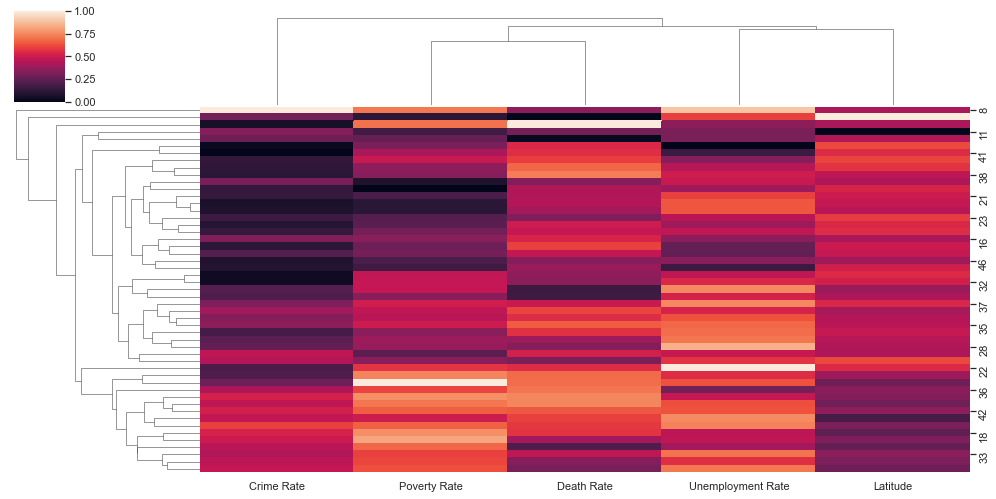

In [15]:
# Plot a hierarchically clustered heatmap
expl_col = ['Crime Rate', 'Poverty Rate', 'Unemployment Rate', 'Latitude', 'Death Rate']
cluster_data = expl_data_2011.filter(expl_col)
g = sns.clustermap(cluster_data, figsize=(14, 7), standard_scale=1)
plt.savefig('../images/dendrogram_2011.png')

In [16]:
# Correlation Matrix (Crime Adj Rate and Economic Indicators)
corr_data = expl_data_2011.drop('Year',1)
corr = corr_data.corr()
print('Correlation Matrix, State Level, 2011')
corr.style.background_gradient(cmap='coolwarm')

Correlation Matrix, State Level, 2011


,Crime Rate,Poverty Rate,Unemployment Rate,Latitude,Property Crime Rate,Violence Crime Rate,Death Rate,Cancer Rate,Influenza & Pneumonia Rate,Suicide Rate
Crime Rate,1.000000,0.524317,0.427287,-0.452675,0.984839,0.776492,-0.019115,-0.075902,-0.154800,-0.144351
Poverty Rate,0.524317,1.000000,0.295770,-0.451498,0.531410,0.352487,0.422120,0.244794,0.181938,0.051861
Unemployment Rate,0.427287,0.295770,1.000000,-0.107131,0.380437,0.478439,-0.063156,0.010901,-0.204621,-0.375390
Latitude,-0.452675,-0.451498,-0.107131,1.000000,-0.498244,-0.161041,-0.194911,-0.081435,-0.291430,0.214722
Property Crime Rate,0.984839,0.531410,0.380437,-0.498244,1.000000,0.655411,0.000246,-0.065350,-0.171942,-0.103518
Violence Crime Rate,0.776492,0.352487,0.478439,-0.161041,0.655411,1.000000,-0.084119,-0.093084,-0.049405,-0.252460
Death Rate,-0.019115,0.422120,-0.063156,-0.194911,0.000246,-0.084119,1.000000,0.939342,0.591834,0.021846
Cancer Rate,-0.075902,0.244794,0.010901,-0.081435,-0.065350,-0.093084,0.939342,1.000000,0.506632,-0.085363
Influenza & Pneumonia Rate,-0.154800,0.181938,-0.204621,-0.291430,-0.171942,-0.049405,0.591834,0.506632,1.000000,-0.181850
Suicide Rate,-0.144351,0.051861,-0.375390,0.214722,-0.103518,-0.252460,0.021846,-0.085363,-0.181850,1.000000


        Data exploration for 2011 year (Northern vs Southern States)


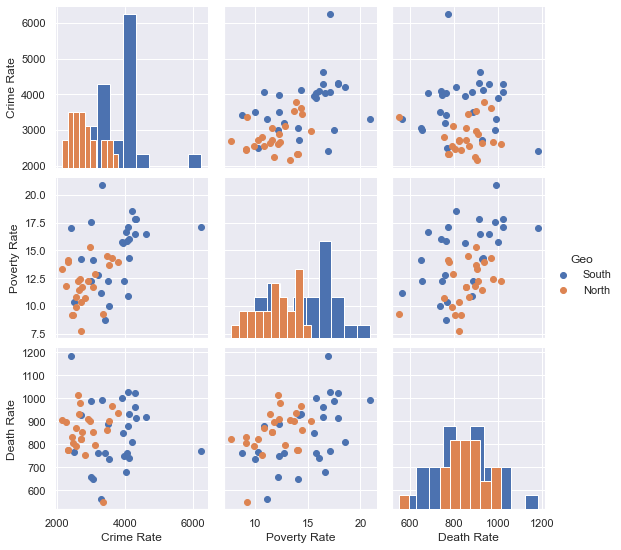

In [17]:
# Data Exploration for 2011
pair_plot = expl_data_2011[['Crime Rate', 'Poverty Rate', 'Death Rate', 'Geo']]
g=sns.PairGrid(pair_plot, hue='Geo')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
print(' '*7,'Data exploration for 2011 year (Northern vs Southern States)')
plt.savefig('images/exploration_2011.png')

## Data Analysis
* 2011

In [18]:
def ecdf(data):
    """Compute Empirical Cumulutive Distribution Function (ECDF) for a one-dimensional array of measurements."""    
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

def sample_ecdf(data):
    """Compute Empirical Cumulutive Distribution Function (ECDF) for a sample."""
    mu = np.mean(data)
    sigma = np.std(data)
    samples = np.random.normal(mu, sigma, 10000)
    x_theor, y_theor = ecdf(samples)
    return x_theor, y_theor

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1 )

    return bs_slope_reps, bs_intercept_reps

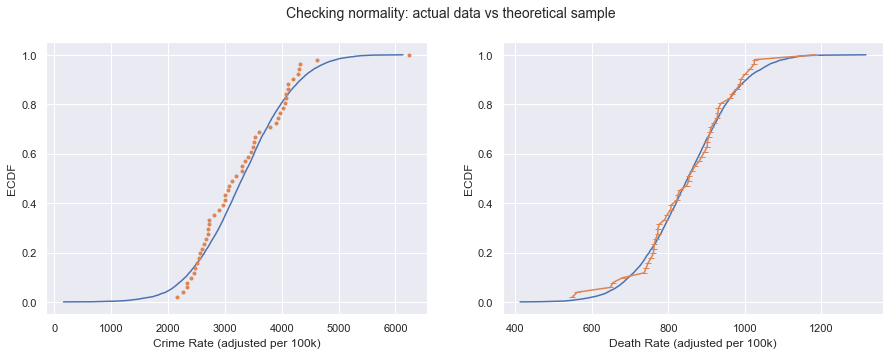

In [19]:
# Determine if the Crime Rate and Death Rate are considered normally distributed
crime = expl_data_2011['Crime Rate']
death = expl_data_2011['Death Rate']

# Determine if the tumor volume is considered normally distributed
x_crime, y_crime = ecdf(crime)
x_crime_theor, y_crime_theor = sample_ecdf(crime)
# Determine if the mouse weight is considered normally distributed
x_death, y_death = ecdf(death)
x_death_theor, y_death_theor = sample_ecdf(death)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Checking normality: actual data vs theoretical sample', size=14)

_=ax1.plot(x_crime_theor, y_crime_theor)
_=ax1.plot(x_crime, y_crime, marker='.', linestyle='none')
_=ax1.set_xlabel('Crime Rate (adjusted per 100k)')
_=ax1.set_ylabel('ECDF')

_=ax2.plot(x_death_theor, y_death_theor)
_=ax2.plot(x_death, y_death, marker = '_')
_=ax2.set_xlabel('Death Rate (adjusted per 100k)')
_=ax2.set_ylabel('ECDF')

In [20]:
# Generate a summary statistics table
expl_data_2011.groupby('Geo')[['Crime Rate', 'Death Rate']].agg(['mean', 'median','var','std','sem'])

Crime Rate                                   Death Rate         \
            mean   median        var    std    sem       mean median   
Geo                                                                    
North   2,823.74 2,712.89 205,365.78 453.17  92.50     854.24 858.48   
South   3,745.74 3,941.37 607,458.92 779.40 149.99     847.66 848.12   

                              
            var    std   sem  
Geo                           
North  8,950.45  94.61 19.31  
South 20,472.33 143.08 27.54

In [21]:
# Generate a summary statistics table
expl_data_2011.groupby('Year')[['Crime Rate', 'Death Rate']].agg(['mean', 'median','var','std','sem'])

Crime Rate                                   Death Rate                   \
           mean   median        var    std    sem       mean median       var   
Year                                                                            
2011   3,311.86 3,199.19 626,369.82 791.44 110.82     850.76 854.56 14,773.80   

                   
        std   sem  
Year               
2011 121.55 17.02

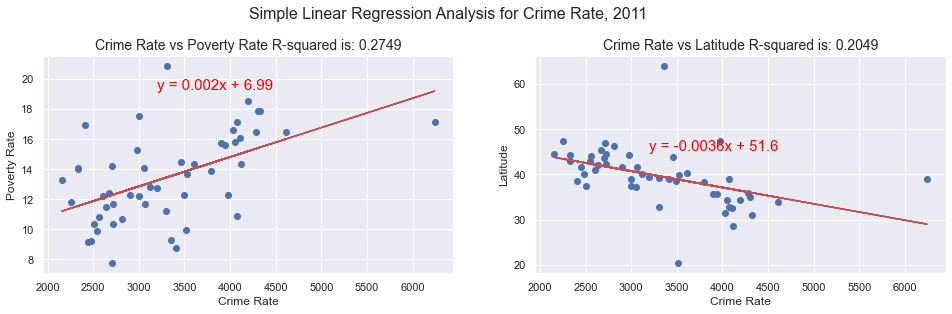

In [23]:
# Regression Analysiss for 2011
crime_pov = DataAnalysis(expl_data_2011['Crime Rate'], expl_data_2011['Poverty Rate'])
crime_lat = DataAnalysis(expl_data_2011['Crime Rate'], expl_data_2011['Latitude'])

# using the variable axs for multiple Axes
plt.figure(figsize=(25, 4))
plt.subplot(131)
plt.suptitle('Simple Linear Regression Analysis for Crime Rate, 2011', x= 0.35, y=1.05, size=16)
crime_pov.scat_plot()
plt.subplot(132)
crime_lat.scat_plot()